In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wg

In [4]:
def Gaussian(x, m, s):
    """Calculates a Gaussian for an array of positions.

    Args:
        x (array): positions.
        m (float): mean.
        s (float): standard deviation.

    Returns:
        (array): Gaussian values at x."""

    G = 1 / np.sqrt(s * np.sqrt(2 * np.pi)) * np.exp(-((x - m) ** 2) / (4 * s**2))

    return G


def Exponential(x, gamma):
    """Calculates an Exponential enveloppe for an array of positions.

    Args:
        x (array): positions.
        gamma (float): exponential parameter.

    Returns:
        (array): Exponential values at x."""

    E = (gamma) ** (1 / 2) * np.exp(-gamma * x / 2) * np.heaviside(x, 1)

    return E


def Overlap(u, v, x):
    """Calculates the overlap integral between 2 wave functions.

    Args:
        u (array): wave function 1.
        v (array): wave function 2..
        x (array): positions.

    Returns:
        (float): Overlap integral value."""

    OverLap = sc.integrate.simps(np.conj(u) * v, x)

    return OverLap

### Initializing nonorthogonal functions
In this simulation, the wave enveloppes could be either Gaussian or exponential :

$$\psi(x) = \frac{1}{\sqrt{\sigma\sqrt{2\pi}}}\exp{\left(-\frac{x^2}{4\sigma^2}\right)} \hspace{12pt} \textrm{or} \hspace{12pt} \psi(x) = \sqrt{\gamma}\exp{\left(-\frac{\gamma}{2}x\right)}u(x)$$

Let $\psi_i$ be a wave function with a shift $x_i$, which means : $\psi_i(x)=\psi(x-x_i)$



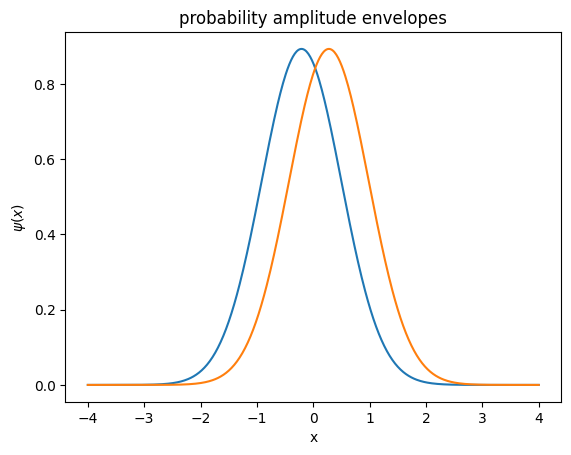

In [5]:
env_type = 1  # 1=Gaussian, 2=exponential
N = 500  # number of x points to plot the wave functions
N_shift = 2  # total number of shifted wave functions
waves = np.zeros((N_shift, N))  # values for each wave function

if env_type == 1:
    sigma_wave = 0.5  # standard deviation of wave function
    x = np.linspace(-8 * sigma_wave, 8 * sigma_wave, N)  # position values
    param_shift = (
        sigma_wave / 10
    )  # standard deviation of shift values (we assume that the shift is normally distributed)
    x_shift = np.random.standard_cauchy(N_shift) * param_shift  # shift values
    for i in range(N_shift):
        waves[i] = Gaussian(x, x_shift[i], sigma_wave)
if env_type == 2:
    gamma_wave = 0.5
    param = gamma_wave
    x = np.linspace(-5 / gamma_wave, 15 / gamma_wave, N)  # position values
    param_shift = 5 / (gamma_wave) / 10
    x_shift = np.random.standard_cauchy(N_shift) * param_shift  # shift values

    for i in range(N_shift):
        waves[i] = Exponential(x - x_shift[i], gamma_wave)
# plotting wave functions
plt.figure()
plt.plot(x, waves.T)
plt.xlabel("x")
plt.ylabel(r"$\psi (x)$")
plt.title("probability amplitude envelopes")
plt.show()

### Building orthogonal base
the Gram-Schmidt Orthogonalization method consists in bulding the new orthonormal basis $\{|\theta_n\rangle\}$ from the existing wave functions $\{|\psi_i\rangle\}$ using the following method :
$$\begin{align*}
&|\theta_1\rangle=|\psi_1\rangle\\
&|\theta_2\rangle=\frac{|\psi_2\rangle-\langle\psi_2|\theta_1\rangle|\theta_1\rangle}{\langle\theta_2|\theta_2\rangle}\\
&|\theta_3\rangle=\frac{|\psi_3\rangle-\langle\psi_3|\theta_1\rangle|\theta_1\rangle-\langle\psi_3|\theta_2\rangle|\theta_2\rangle}{\langle\theta_3|\theta_3\rangle}\\
&\vdots\\
&|\theta_n\rangle=\frac{|\psi_n\rangle-\sum_i^n\langle\psi_n|\theta_i\rangle|\theta_i\rangle}{\langle\theta_n|\theta_n\rangle}
\end{align*}$$

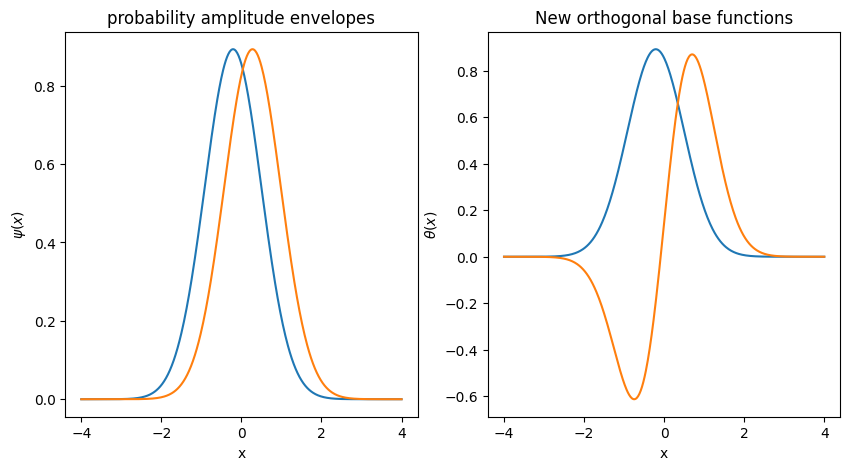

In [6]:
new_base = np.zeros((N_shift, N))
for i in range(N_shift):
    new_base[i] = waves[i]
    for j in range(i):
        new_base[i] = new_base[i] - Overlap(new_base[j], waves[i], x) * new_base[j]
    new_base[i] = new_base[i] / np.sqrt(Overlap(new_base[i], new_base[i], x))

# Plotting new wave functions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, waves.T)
plt.xlabel("x")
plt.ylabel(r"$\psi (x)$")
plt.title("probability amplitude envelopes")
plt.subplot(1, 2, 2)
plt.plot(x, new_base.T)
plt.xlabel("x")
plt.ylabel(r"$\theta(x)$")
plt.title("New orthogonal base functions")
plt.savefig('schmidt.png')
plt.show()


### Checking Orthogonality and normalization

In [7]:
for i in range(N_shift):
    for j in range(i):
        over = sc.integrate.simps(new_base[i] * new_base[j], x)
        print(f"overlap between wave function {i} and wave function {j} : {over}")
    over = sc.integrate.simps(new_base[i] * new_base[i], x)
    print(f"overlap between wave function {i} and wave function {i} : {over}")

overlap between wave function 0 and wave function 0 : 1.0000000000000002
overlap between wave function 1 and wave function 0 : -4.0382417586166287e-16
overlap between wave function 1 and wave function 1 : 1.0


### Interactive presentation

In [8]:
def schmidt(N_shift):
    N_shift=int(N_shift)
    env_type = 2  # 1=Gaussian, 2=exponential
    N = 500  # number of x points to plot the wave functions
    waves = np.zeros((N_shift, N))  # values for each wave function

    if env_type == 1:
        sigma_wave = 0.5  # standard deviation of wave function
        x = np.linspace(-8 * sigma_wave, 8 * sigma_wave, N)  # position values
        param_shift = (
            sigma_wave / 10
        )  # standard deviation of shift values (we assume that the shift is normally distributed)
        x_shift = np.random.standard_cauchy(N_shift) * param_shift  # shift values
        for i in range(N_shift):
            waves[i] = Gaussian(x, x_shift[i], sigma_wave)
    if env_type == 2:
        gamma_wave = 0.5
        param = gamma_wave
        x = np.linspace(-5 / gamma_wave, 15 / gamma_wave, N)  # position values
        param_shift = 5 / (gamma_wave) / 10
        x_shift = np.random.standard_cauchy(N_shift) * param_shift  # shift values

        for i in range(N_shift):
            waves[i] = Exponential(x - x_shift[i], gamma_wave)
    new_base = np.zeros((N_shift, N))
    for i in range(N_shift):
        new_base[i] = waves[i]
        for j in range(i):
            new_base[i] = new_base[i] - Overlap(new_base[j], waves[i], x) * new_base[j]
        new_base[i] = new_base[i] / np.sqrt(Overlap(new_base[i], new_base[i], x))

    # Plotting new wave functions
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, waves.T)
    plt.xlabel("x")
    plt.ylabel(r"$\psi (x)$")
    plt.title("probability amplitude envelopes")
    plt.subplot(1, 2, 2)
    plt.plot(x, new_base.T)
    plt.xlabel("x")
    plt.ylabel(r"$\theta(x)$")
    plt.title("New orthogonal base functions")
    #plt.savefig('schmidt.png')
    plt.show()
N_shift=2
N_shift_slide = wg.FloatSlider(value=N_shift,min=2,max=10,step=1)
wg.interact(schmidt, N_shift=N_shift_slide)

interactive(children=(FloatSlider(value=2.0, description='N_shift', max=10.0, min=2.0, step=1.0), Output()), _…

<function __main__.schmidt(N_shift)>